In [505]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [506]:
surya = pd.read_csv('Company_Data.csv')
surya

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [507]:
surya['Sales'].max()

16.27

In [508]:
surya.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [509]:
surya.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [510]:
surya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [511]:
surya.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [512]:
surya.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [513]:
#sn.pairplot(surya)

In [514]:
surya.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

<ipython-input-515-f19315931f05>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(surya.corr(), cmap='magma', annot=True, fmt=".2f")


<Axes: >

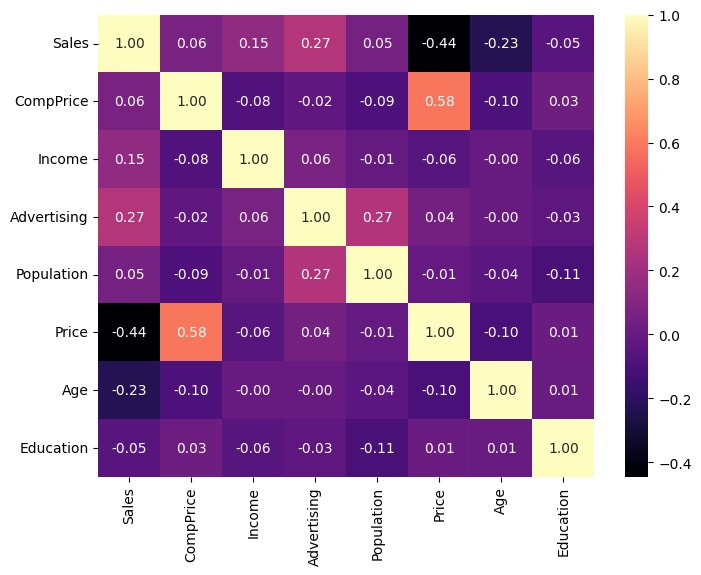

In [515]:
plt.figure(figsize = (8, 6));
sn.heatmap(surya.corr(), cmap='magma', annot=True, fmt=".2f")


<Axes: >

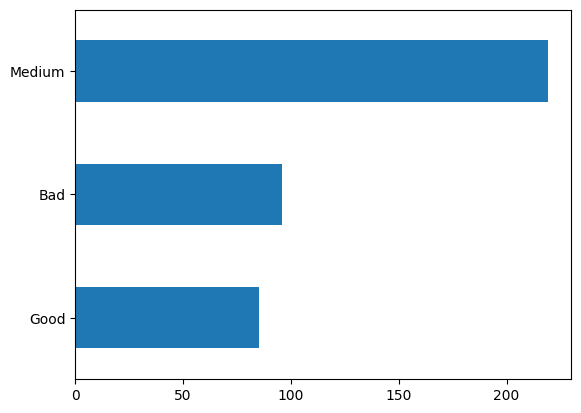

In [516]:
surya.ShelveLoc.value_counts(ascending=True).plot(kind='barh')

In [517]:
surya=pd.get_dummies(surya,columns=['Urban','US'],drop_first=True)

In [518]:
surya

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [519]:
from sklearn import preprocessing
le= preprocessing.LabelEncoder()
surya['ShelveLoc']= le.fit_transform(surya['ShelveLoc'])

In [520]:
surya

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [521]:
surya['Sales'].max()

16.27

In [522]:
for labels in range(0,len(surya['Sales'])):
    if surya['Sales'].iloc[labels]<=8:
        surya['Sales'].iloc[labels]='Low'
    else:
        surya['Sales'].iloc[labels]='high'

<ipython-input-522-d172058db5d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surya['Sales'].iloc[labels]='high'


In [523]:
surya

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,high,138,73,11,276,120,0,42,17,1,1
1,high,111,48,16,260,83,1,65,10,1,1
2,high,113,35,10,269,80,2,59,12,1,1
3,Low,117,100,4,466,97,2,55,14,1,1
4,Low,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,1,33,14,1,1
396,Low,139,23,3,37,120,2,55,11,0,1
397,Low,162,26,12,368,159,2,40,18,1,1
398,Low,100,79,7,284,95,0,50,12,1,1


In [524]:
from sklearn.model_selection import train_test_split

In [525]:
x= surya.iloc[:,1:]
y = surya['Sales']

In [526]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [527]:
y

0      high
1      high
2      high
3       Low
4       Low
       ... 
395    high
396     Low
397     Low
398     Low
399    high
Name: Sales, Length: 400, dtype: object

Entropy

In [528]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [529]:
model = RandomForestClassifier(criterion = 'entropy',max_depth = 7,random_state =42)
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, random_state=42)

In [530]:
model.feature_importances_

array([0.10562727, 0.10170602, 0.12823016, 0.08321141, 0.22797256,
       0.13313622, 0.13767614, 0.05094365, 0.01599542, 0.01550114])

In [531]:
preds= model.predict(X_test)
pd.Series(preds).value_counts()

Low     47
high    33
dtype: int64

In [532]:
pd.crosstab(y_test,preds)

col_0,Low,high
Sales,,
Low,38,5
high,9,28


In [533]:
np.mean(preds==y_test)

0.825

Gini

In [534]:
model = RandomForestClassifier(criterion = 'gini',max_depth = 8,random_state = 42)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [535]:
preds= model.predict(X_test)
pd.Series(preds).value_counts()

Low     50
high    30
dtype: int64

In [536]:
pd.crosstab(y_test,preds)

col_0,Low,high
Sales,,
Low,39,4
high,11,26


In [537]:
np.mean(preds==y_test)

0.8125

In [538]:
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model = RandomForestClassifier(criterion='entropy', max_depth= max_depth, random_state= 42)
    model.fit(X_train, y_train)
    train_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

In [539]:
accuracies = pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy, 'test_acc':test_accuracy})
accuracies

,max_depth,train_acc,test_acc
0,1,0.668750,0.5875
1,2,0.787500,0.6750
2,3,0.828125,0.7000
3,4,0.859375,0.7375
4,5,0.925000,0.8000
5,6,0.978125,0.7750
6,7,0.990625,0.8250
7,8,0.993750,0.8000
8,9,1.000000,0.7750
9,10,1.000000,0.7750


In [540]:
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model = RandomForestClassifier(criterion='gini', max_depth= max_depth, random_state= 42)
    model.fit(X_train, y_train)
    train_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

In [541]:
accuracies = pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy, 'test_acc':test_accuracy})
accuracies

,max_depth,train_acc,test_acc
0,1,0.668750,0.6000
1,2,0.790625,0.6875
2,3,0.837500,0.7125
3,4,0.871875,0.7125
4,5,0.950000,0.7500
5,6,0.975000,0.7500
6,7,0.981250,0.8000
7,8,0.996875,0.8125
8,9,1.000000,0.8000
9,10,1.000000,0.7500


KFold

In [542]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=42, shuffle = True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features,random_state=42)

In [543]:
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.825
